In [1]:
import atomictools as at
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
pio.renderers.default='iframe'

In [2]:
def sph_to_cart(r, theta, phi):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z

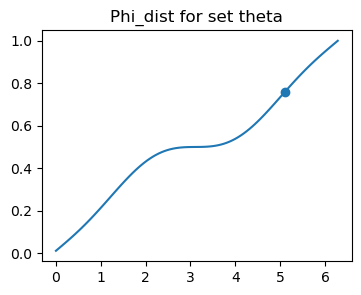

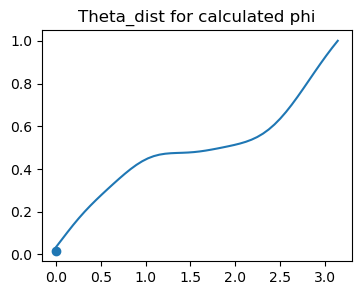

In [3]:
#creamos las variables que necesitamos para las pruebas
phi = np.linspace(0, 2*np.pi, 100)
theta = np.linspace(0, np.pi, 50)
functions=([1,0], [2,-1], [3,0], [4,-2])
coefs=(1,2,1,1)
f_ang=at.comb_ang_function(functions, coefs)

#indice aleatorio en theta para iniciar el cálculo
theta_index = int(np.random.random()*50)
if theta_index==0:
    theta_index = int(np.random.random()*50)

#cálculo de la distribución de probabilidad para este theta aleatorio
prob_dist = f_ang.prob*np.sin(theta[theta_index])

#distribución en phi para el theta aleatorio
dist_phi_i = prob_dist[:,theta_index].cumsum()*2*np.pi/100
dist_phi_i /= dist_phi_i[-1]

#extracción de un phi aleatorio dentro de esta distribución
points = 1
p = np.random.random(points)
phi_fin = np.interp(p, dist_phi_i, phi)
plt.figure(figsize=(4,3))
plt.title('Phi_dist for set theta')
plt.plot(phi, dist_phi_i)
plt.scatter(phi_fin, p)
plt.show()

#búsqueda del índice asociado al valor de phi aleatorio en los valores
#posibles de phi
indice = np.where(abs(phi-phi_fin)<0.032)

#calculo de la distribución en theta para el phi obtenido
dist_theta_j = prob_dist[indice,:].cumsum()*np.pi/50
dist_theta_j /= dist_theta_j[-1]

#extracción de un theta aleatorio asociado al phi obtenido anteriormente
points=1
p = np.random.random(points)
theta_fin = np.interp(p, dist_theta_j, theta)
plt.figure(figsize=(4,3))
plt.title('Theta_dist for calculated phi')
plt.plot(theta, dist_theta_j)
plt.scatter(theta_fin, p)
plt.show()

In [4]:
#conversion del proceso anterior en una funcion
def get_r(r_dist, rs, points=1):
            p = np.random.random(points)
            r = np.interp(p, r_dist, rs)
            return r

def get_theta_phi(points, f_ang):
    phis = []
    thetas = []
    
    for i in range(points):
        indice = np.array([])
        
        while np.size(indice)==0:
            
            theta_index = 0
            while theta_index==0:
                 theta_index = int(np.random.random()*50)
                
            prob_dist = f_ang.prob*np.sin(theta[theta_index])
    
            dist_phi_i = prob_dist[:,theta_index].cumsum()*2*np.pi/100
            dist_phi_i /= dist_phi_i[-1]
    
            points = 1
            p = np.random.random(points)
            phi_fin = float(np.interp(p, dist_phi_i, phi))
            phis.append(phi_fin)
    
            indice = np.where(abs(phi-phi_fin)<0.032)
        
        if np.size(indice) == 1:
            dist_theta_j = prob_dist[indice,:].cumsum()*np.pi/50
            dist_theta_j /= dist_theta_j[-1]
            
        elif np.size(indice) > 1:
            indice_1 = indice[0][0]
            dist_theta_j = prob_dist[indice_1,:].cumsum()*np.pi/50
            dist_theta_j /= dist_theta_j[-1]
         
        points=1
        p = np.random.random(points)
        theta_fin = float(np.interp(p, dist_theta_j, theta))
        thetas.append(theta_fin)
    
    return phis, thetas

In [5]:
#pruebas. primero replicamos orbitales conocidos

In [6]:
#datos para las pruebas
f_rad = at.R_hydrog(3,2)
f_ang = at.spherical_harmonic(2,0)

In [7]:
#calculamos 10000 phis y thetas con el nuevo método definido
phis, thetas = get_theta_phi(10000, f_ang)

In [8]:
#calculamos rs
r = f_rad.r
r_dist = f_rad.P2.cumsum() * f_rad.rmax / (f_rad.npt-1)
r_dist /= r_dist[-1]

rs = get_r(r_dist, r, 10000)

In [9]:
#convertimos a cartesianas para el plot en scatter
x, y, z = sph_to_cart(rs, thetas, phis)

In [11]:
op=1
rmax = f_rad.rmax
fig=go.Figure(data=go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode='markers',
            marker=dict(size=1., color = 'red'),
            opacity=op
            ))
fig.update_layout(
            #showlegend=False,
            scene = dict(
                xaxis = dict(nticks=4, range=[-rmax, rmax]),
                yaxis = dict(nticks=4, range=[-rmax, rmax]),
                zaxis = dict(nticks=4, range=[-rmax, rmax]),
                aspectmode = 'cube'
            )
        )
fig.show()

In [12]:
#comparamos con el output de la clase orbital en volumen
at.orbital(f_rad, f_ang).plot_volume()

El output es el mismo, presentan la misma forma. En este caso, al ser un test con una funcion sin combinación, probablemente sería más eficiente emplear orbital_hydrog que no emplea interpolación.

Probamos ahora para una combinación de funciones angulares

In [ ]:
functions=([1,0], [2,-1])
coefs=(2,1)
f_rad_1 = at.R_hydrog(2,1)
f_ang_1 = at.comb_ang_function(functions, coefs)
phis_1, thetas_1 = get_theta_phi(10000, f_ang_1)
r = f_rad_1.r
r_dist = f_rad_1.P2.cumsum() * f_rad_1.rmax / (f_rad_1.npt-1)
r_dist /= r_dist[-1]

rs_1 = get_r(r_dist, r, 10000)
#convertimos a cartesianas para el plot en scatter
x_1, y_1, z_1 = sph_to_cart(rs_1, thetas_1, phis_1)

op=1
rmax = f_rad_1.rmax
fig=go.Figure(data=go.Scatter3d(
            x=x_1,
            y=y_1,
            z=z_1,
            mode='markers',
            marker=dict(size=1., color = 'red'),
            opacity=op
            ))
fig.update_layout(
            #showlegend=False,
            scene = dict(
                xaxis = dict(nticks=4, range=[-rmax, rmax]),
                yaxis = dict(nticks=4, range=[-rmax, rmax]),
                zaxis = dict(nticks=4, range=[-rmax, rmax]),
                aspectmode = 'cube'
            )
        )
fig.show()

El método funciona y produce un output aparentemente coherente. Comprobemos que pasa al comparar con el output de orbital en volumen

In [ ]:
at.orbital(f_rad_1,f_ang_1).plot_volume()

Como vemos, el output es parecido pero no idéntico.